In [53]:
#Aidan Leith
#Programming Assignment 4: KNN

#Loading and Exploring Data
from sklearn import datasets
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

#load data
features, targets = datasets.load_digits(return_X_y = True, as_frame = True)

#print shapes
print(f"Feature shape: {features.shape}")
print(f"Targets shape: {targets.shape}")

#split data
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=500, random_state=42)

print(f"Shape of X_Train: {X_train.shape}")
print(f"Shape of y_Train: {y_train.shape}")
print(f"Shape of X_Test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")



Feature shape: (1797, 64)
Targets shape: (1797,)
Shape of X_Train: (1297, 64)
Shape of y_Train: (1297,)
Shape of X_Test: (500, 64)
Shape of y_test: (500,)


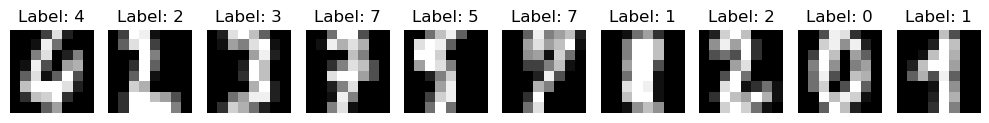

In [55]:
#Visualize Data
random_indices = np.random.choice(X_train.shape[0], size=10, replace=False)

# Create a grid for displaying the images
plt.figure(figsize=(10, 5))

for i, index in enumerate(random_indices):
    plt.subplot(1, 10, i + 1)  
    plt.imshow(X_train.iloc[index].values.reshape(8, 8), cmap='gray')
    plt.title(f'Label: {y_train.iloc[index]}')  
    plt.axis('off') 

plt.tight_layout()
plt.show()


In [57]:
#Implement KNN Classifier

kVals = [1,3,5,7,9]
classifiers = {}

for k in kVals:
    
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    classifiers[k] = knn



In [59]:
#Evaluate and Compare Classifiers

f1Scores = {}

for k, clf in classifiers.items():
    pred = clf.predict(X_test)
    res = f1_score(y_test, pred, average = 'weighted')
    f1Scores[k]  = res

f1ScoresDf = pd.DataFrame(list(f1Scores.items()), columns=['k', 'F1 Score'])

print(f1ScoresDf)

   k  F1 Score
0  1  0.984033
1  3  0.989941
2  5  0.993981
3  7  0.991967
4  9  0.981890


Above shows the f1 score to the corresponding k value. As shown, the f1 score are all very relatively close and high. This 
demonstrates that my model is performing well on a range of k value. However, it seems that as I increased my k values,
the f1 score increased. It peaked at k = 5, and then started to go back down. This may indicate the optimal k value
is 5 for my model.

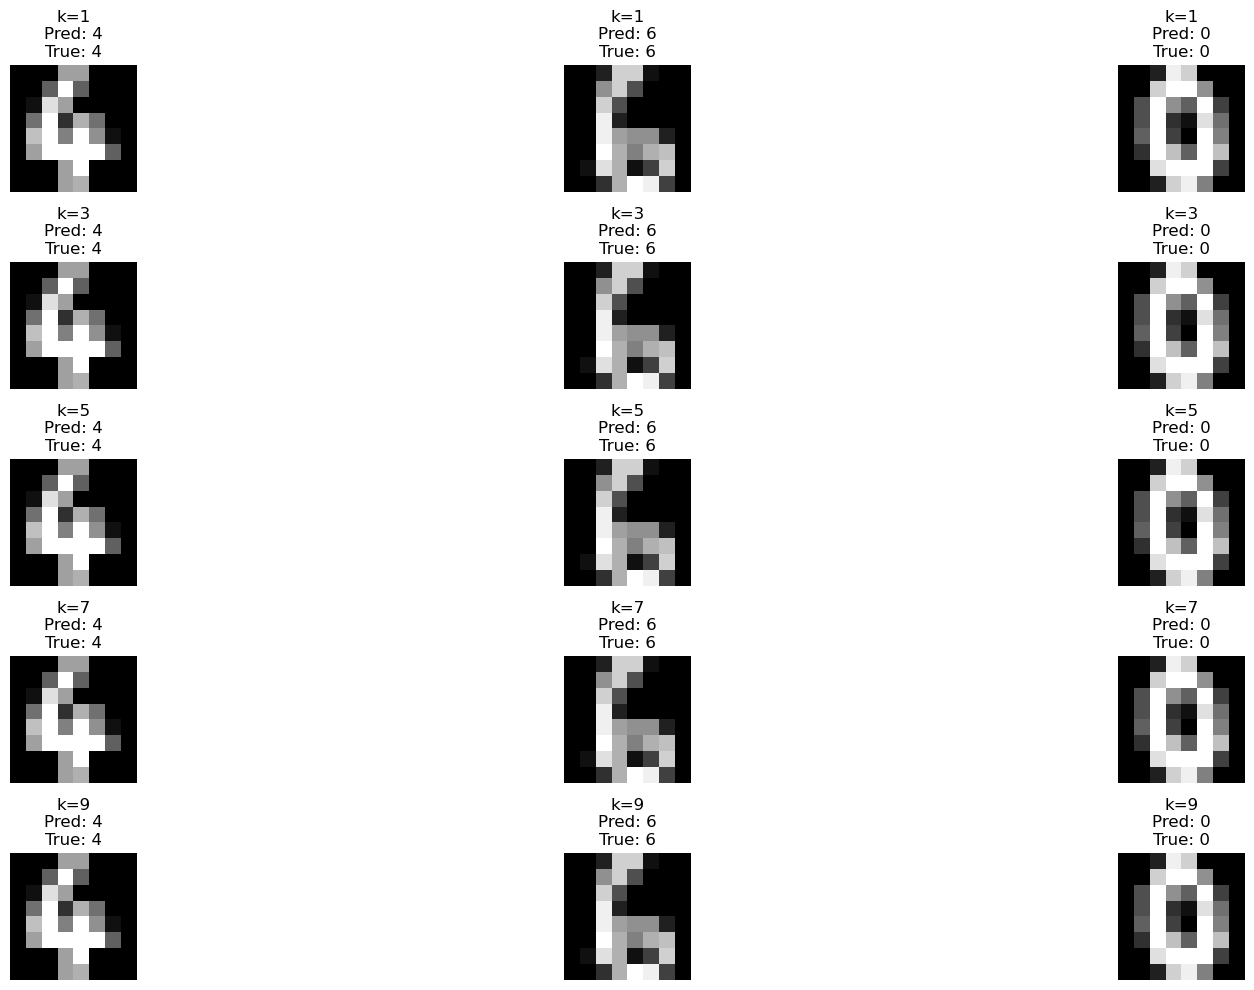

In [62]:
#Visualize Qualitative Predictions

random_indices = np.random.choice(X_test.shape[0], size=3, replace=False)
plt.figure(figsize=(20, 10))

for row, k in enumerate(kVals):
    clf = classifiers[k]
    y_pred = clf.predict(X_test.iloc[random_indices])

    for i, index in enumerate(random_indices):
        plt.subplot(len(kVals), 3, row * 3 + i + 1)
        plt.imshow(X_test.iloc[index].values.reshape(8, 8), cmap='gray')
        plt.axis('off')
        
        true_label = y_test.iloc[index]
        pred_label = y_pred[i]
        plt.title(f"k={k}\nPred: {pred_label}\nTrue: {true_label}")

plt.tight_layout()
plt.show()


As seen above, I selected 3 samples for each k value. For each image, I displayed the k value, the predicted value, and the true value.
All of the predicted labels were correct for each k value and digit. This could be due to the fact that this is restricted to a 
small amount of samples. However, all of my samples being correct can be explained due to the high f1 score I obtained, meaning
I will get a small amount of incorrect predictions. 